In [134]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('monokai')

##  The context
The Shinkansen, popularly known as the bullet train, is a crucial mode of travel in Japan, renowned for its efficiency and speed. However, despite its high profile, only 56% of passengers have reported satisfaction with their experience. The travel industry is focused on understanding the factors contributing to both satisfaction and dissatisfaction among passengers. Improving the experience for those who are dissatisfied could markedly elevate overall satisfaction scores.

## The key Questions
- What factors most influence passenger satisfaction on the Shinkansen?
- Is there a noticeable difference in satisfaction levels across different demographic groups?
- How do travel distance and delay times correlate with passenger satisfaction?

## Executive summary
This project analyzed passenger data to understand factors influencing satisfaction. The study focused on age distribution, satisfaction across age groups, gender influence, and the relationship between travel distance and delay times. 
Key findings include:
-  Emphasizing service quality and tailored experiences based on demographic insights emerges as a strategic approach to improve satisfaction levels among Shinkansen passengers.
- Mid-20s and early 40s are the largest passenger demographic groups.
- Passenger satisfaction varies significantly across different age and gender groups.
- Travel distance does not significantly impact delay times or passenger satisfaction.
- Gender significantly influences satisfaction, with disparities observed between age groups.

#### Table of contents: 
- [Data exploration](#Data-exploration)
- [Cleaning](#Cleaning)
- [Analysis](#Analysis)
- [Insights, recommendations + conclusion](#Insights-and-recommendations-+-conclusion)

In [191]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
np.set_printoptions(suppress=True)
import missingno as msno
# Plotting and visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.io as pio
import plotly.express as px
pio.renderers.default = "svg"
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import skew, pearsonr, normaltest, ttest_ind, f_oneway, chisquare, chi2_contingency as chi2cont, shapiro
import warnings
warnings.filterwarnings("ignore")

## Data dictionary 
| Variable                | Description                                      | Type   |
|-------------------------|--------------------------------------------------|--------|
| `ID`                    | Unique identifier for each survey response       | int64  |
| `Overall_Experience`    | Satisfaction level (1: Satisfied, 0: Not)        | int64  |
| `Seat_Comfort`          | Comfort of the seat                              | object |
| `Seat_Class`            | Class of seat (Regular, or Green(premium)        | object |
| `Arrival_Time_Convenient`| Convenience of arrival time                     | object |
| `Catering`              | Quality of food and beverages                    | object |
| `Platform_Location`     | Location of the platform                         | object |
| `Onboard_Wifi_Service`  | Quality of onboard WiFi service                  | object |
| `Onboard_Entertainment` | Entertainment options onboard                    | object |
| `Online_Support`        | Quality of online support services               | object |
| `Ease_of_Online_Booking`| Ease of booking online                           | object |
| `Onboard_Service`       | Quality of onboard service                       | object |
| `Legroom`               | Amount of legroom available                      | object |
| `Baggage_Handling`      | Efficiency of baggage handling                   | object |
| `CheckIn_Service`       | Quality of check-in service                      | object |
| `Cleanliness`           | Overall cleanliness                             | object |
| `Online_Boarding`       | Ease of online boarding process                  | object |

In [192]:
train = pd.read_csv('/Users/moiezismail/projects/Shinkansen/raw_travel.csv')
survey = pd.read_csv('/Users/moiezismail/projects/Shinkansen/raw_survey.csv')

## Data exploration

In [193]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


#### Observation
- 

In [194]:
train.isnull().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64

In [195]:
train.sample(5)

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
21245,98821246,Female,Disloyal Customer,30.00,Business Travel,Eco,1968,10.00,2.00
46571,98846572,Female,Loyal Customer,42.00,Business Travel,Business,3565,0.00,5.00
1850,98801851,Female,Loyal Customer,48.00,Business Travel,Business,2495,0.00,0.00
58574,98858575,Male,Loyal Customer,46.00,Personal Travel,Eco,1163,0.00,0.00
54272,98854273,Male,Disloyal Customer,23.00,NaN,Eco,1593,0.00,0.00


### Observations
- The shinkansen being late by 126 min does not make any sense, it's most likely seconds so that will be changed

In [196]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [197]:
survey.isnull().sum()

ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

In [198]:
survey.sample(5)

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
81693,98881694,1,Excellent,Green Car,Excellent,Excellent,Inconvenient,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Acceptable,Excellent,Excellent
62198,98862199,1,Excellent,Ordinary,Acceptable,Excellent,Manageable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Excellent,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement
44331,98844332,0,Needs Improvement,Ordinary,Acceptable,Acceptable,Convenient,Excellent,Acceptable,Excellent,Excellent,Good,Poor,Good,Good,Acceptable,Excellent
25437,98825438,0,Acceptable,Ordinary,Excellent,Needs Improvement,Very Convenient,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Needs Improvement,Excellent,Acceptable,Good,Excellent
51021,98851022,0,Acceptable,Green Car,Needs Improvement,Acceptable,Manageable,Excellent,Acceptable,Excellent,Excellent,Poor,Acceptable,Good,Good,Good,Excellent


#### Observations
-  the amount of NULL values isn't significant so they
can be just dropped if need be. 
- tt does not make sense to have NULL values categories such as "leg room" as it's not possible that it did not apply to a passenger or that there was no leg-room 

## Cleaning

#### Merged datasets of travel and survey

In [199]:
data = survey.merge(train, on='ID', how='left')

In [200]:
data = data.dropna()

#### Feature engineering

In [201]:
data['delay(seconds)'] = data['Departure_Delay_in_Mins'] + data[
    'Arrival_Delay_in_Mins']
#Travel class does not make sense, Seat class is actual representation of seat categories
data.drop(['Departure_Delay_in_Mins',
             'Arrival_Delay_in_Mins', 'Travel_Class'], axis=1, inplace=True)

In [202]:
data.rename(columns={'Overall_Experience': 'Satisfied',
                      'Travel_Distance':'Travel_Distance(km)'}, inplace=True)

#### Getting proper distance values for aggregation

In [203]:
data['Travel_Distance(km)'] = round(data['Travel_Distance(km)'] / 10)

In [204]:
data[['Age', 'delay(seconds)', 'Travel_Distance(km)']] = data[
    ['Age', 'delay(seconds)', 'Travel_Distance(km)']].astype('int64')

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55503 entries, 1 to 94375
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       55503 non-null  int64 
 1   Satisfied                55503 non-null  int64 
 2   Seat_Comfort             55503 non-null  object
 3   Seat_Class               55503 non-null  object
 4   Arrival_Time_Convenient  55503 non-null  object
 5   Catering                 55503 non-null  object
 6   Platform_Location        55503 non-null  object
 7   Onboard_Wifi_Service     55503 non-null  object
 8   Onboard_Entertainment    55503 non-null  object
 9   Online_Support           55503 non-null  object
 10  Ease_of_Online_Booking   55503 non-null  object
 11  Onboard_Service          55503 non-null  object
 12  Legroom                  55503 non-null  object
 13  Baggage_Handling         55503 non-null  object
 14  CheckIn_Service          55503 non-nul

#### Executive decision: filter out passengers younger than 18 
- since most passengers younger than 18 are 1) unlikely to take the shinkansen at least not by themselves 2) aren't likely to pay for tickets themselves, their opinion is disregarded to make the analysis more appropriate

In [206]:
data = data[data['Age'] >= 18]

#### Creating age-groups 

In [207]:
data['Age_Group'] = data['Age'].apply(lambda x: 'Young Adult' if (x >= 18 and x <= 29)
                                            else ('Middle' if (x >= 30 and x <= 45)
                                            else ('Upper Age' if (x >= 46 and x <= 59)
                                            else 'Elder')))

In [208]:
round(data.drop('ID', axis=1).describe().T)

,count,mean,std,min,25%,50%,75%,max
Satisfied,51257.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00
Age,51257.00,42.00,13.00,18.00,30.00,41.00,52.00,85.00
Travel_Distance(km),51257.00,196.00,104.00,5.00,130.00,190.00,253.00,695.00
delay(seconds),51257.00,30.00,75.00,0.00,0.00,2.00,24.00,2028.00


#### Executive decision: filter out inner-city distances from the travel distance data
- the short distances(5km as the minimum) for such a high-speed train do not reflect  usual travel patterns and just make the data "noisy"
- these short journies do not make sense as most people are using the Shinaksen to travel to cities further than 250km(Tokyo to Nagoya or to Sendai). 
- Since the closest major city to the west, Nagoya, is 251km away from Tokyo, I will filter out the dataset based on distances less than 250km

In [209]:
data = data[data['Travel_Distance(km)'] >= 250]

#### Statistical summary of the numerical variables

In [210]:
round(data.drop('ID', axis=1).describe().T)

,count,mean,std,min,25%,50%,75%,max
Satisfied,13377.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00
Age,13377.00,40.00,13.00,18.00,29.00,39.00,49.00,85.00
Travel_Distance(km),13377.00,330.00,68.00,250.00,275.00,316.00,370.00,695.00
delay(seconds),13377.00,40.00,103.00,0.00,0.00,3.00,28.00,2028.00


#### Observations
1. The average age is now about 40 years-old with oldest passenger at 85.
2. The average distance has also gone up from 196km to a more appropriate 330km

#### Equalizing subjective score
- The subjective score/evalution such as adequate, or needs imporvement are different so 
this will check which ones needs equalizing 

In [211]:
selected_columns = ['Seat_Comfort', 'Arrival_Time_Convenient',
       'Catering', 'Platform_Location', 'Onboard_Wifi_Service',
       'Onboard_Entertainment','Seat_Class', 'Online_Support', 'Ease_of_Online_Booking',
       'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service',
       'Cleanliness', 'Online_Boarding', 'Gender', 'Customer_Type', 'Type_Travel']

for i in selected_columns:
    unique_values = data[i].unique()
    print(f"Unique values in {i}:")
    for value in unique_values:
        print(value)
    print()

Unique values in Seat_Comfort:
Needs Improvement
Excellent
Good
Poor
Acceptable
Extremely Poor

Unique values in Arrival_Time_Convenient:
Needs Improvement
Excellent
Good
Poor
Acceptable
Extremely Poor

Unique values in Catering:
Acceptable
Excellent
Poor
Good
Needs Improvement
Extremely Poor

Unique values in Platform_Location:
Needs Improvement
Manageable
Very Convenient
Convenient
Inconvenient

Unique values in Onboard_Wifi_Service:
Good
Excellent
Needs Improvement
Acceptable
Poor
Extremely Poor

Unique values in Onboard_Entertainment:
Excellent
Acceptable
Good
Poor
Needs Improvement
Extremely Poor

Unique values in Seat_Class:
Ordinary
Green Car

Unique values in Online_Support:
Good
Excellent
Needs Improvement
Acceptable
Poor

Unique values in Ease_of_Online_Booking:
Acceptable
Poor
Needs Improvement
Excellent
Good
Extremely Poor

Unique values in Onboard_Service:
Acceptable
Excellent
Good
Poor
Needs Improvement
Extremely Poor

Unique values in Legroom:
Good
Excellent
Poor
Needs I

## Streamlining Customer Feedback Categories
- Simplification: Transitioning from a five-level to a three-tier feedback system for a more representative and user-friendly approach.
- Rationale: Customers often perceive services like cleanliness to meet a standard expectation, rendering more distinctions redundant. A three-category system (`poor`, `adequate`, `good`) aligns better with genuine perception and is easier for customers to use without the ambiguity of nuanced ratings.

In [212]:
satisfaction_categories = {
    'Poor': 'Poor',
    'Needs Improvement': 'Poor',
    'Inconvenient':'Poor',
    'Very Convenient':'Good',
    'Very Inconvenient':'Poor',
    'Convenient':'Good',
    'Mangeable':'Acceptable',
    'Acceptable': 'Acceptable',
    'Good': 'Good',
    'Excellent': 'Good',
    'Extremely Poor': 'Poor'
}

columns_to_simplify = [
    'Seat_Comfort',
    'Arrival_Time_Convenient',
    'Catering',
    'Platform_Location',
    'Online_Support',
    'Onboard_Service',
    'Cleanliness']

for i in columns_to_simplify:
    data[i] = data[i].replace(satisfaction_categories)

#### Cleaning up  value labels for better readability 

In [213]:
data.loc[data['Satisfied'] == 1, 'Satisfied'] = 'yes'
data.loc[data['Satisfied'] == 0, 'Satisfied'] = 'no'
# shorten the terms for personal and business travel
data.loc[data['Type_Travel'] == 'Personal Travel', 'Type_Travel'] = 'pers'
data.loc[data['Type_Travel'] == 'Business Travel', 'Type_Travel'] = 'biz'
# disloyal does not make sense
data.loc[data['Customer_Type'] == 'Disloyal Customer', 'Customer_Type'] = 'infrequent'
data.loc[data['Customer_Type'] == 'Loyal Customer', 'Customer_Type'] = 'loyal'
# shortening the terms for male and female
data.loc[data['Gender'] == 'Male', 'Gender'] = 'M'
data.loc[data['Gender'] == 'Female', 'Gender'] = 'F' 
# Changing seat categories to more sensible terms
data.loc[data['Seat_Class'] == 'Ordinary', 'Seat_Class'] = 'regular'
data.loc[data['Seat_Class'] == 'Green Car', 'Seat_Class'] = 'premium'

In [214]:
# creating a numerical column based on the changed categorical satisfied column
data['num_sat'] = data['Satisfied'].map({'yes':1,'no':0})

In [215]:
data.sample(3).T

,32121,94110,34938
ID,98832122,98894111,98834939
Satisfied,yes,no,no
Seat_Comfort,Poor,Acceptable,Good
Seat_Class,regular,premium,premium
Arrival_Time_Convenient,Poor,Poor,Poor
Catering,Poor,Poor,Good
Platform_Location,Poor,Good,Poor
Onboard_Wifi_Service,Excellent,Good,Good
Onboard_Entertainment,Excellent,Acceptable,Good
Online_Support,Good,Good,Good


#### Train delay distribution

In [216]:
data['delay(seconds)'].describe()

count   13377.00
mean       40.20
std       103.22
min         0.00
25%         0.00
50%         3.00
75%        28.00
max      2028.00
Name: delay(seconds), dtype: float64

#### Outliers management
1. We will eliminate the outliers for the delay because it's highly skewed to the left

In [217]:
# Function to remove outliers using the Z-Score method
def remove_zscore_outliers(df, column_name):
    z_scores = stats.zscore(df[column_name])
    abs_z_scores = np.abs(z_scores)
    filtered_entries = abs_z_scores < 3
    return df[filtered_entries]

# remove outliers from 'delay(seconds)' column
data = remove_zscore_outliers(data, 'delay(seconds)')

# Confirm that outliers are removed
round(data['delay(seconds)'].describe())

count   13053.00
mean       28.00
std        60.00
min         0.00
25%         0.00
50%         2.00
75%        24.00
max       349.00
Name: delay(seconds), dtype: float64

#### Observation
- with the outliers removed, we now have an average delay of 19 seconds with half of the delays being under 2 seconds! 

#### Executive decision: eliminate irrelevant columns
the elimination is based upon two criteria:
- not entirely within Shinkansen's control nor expertise(thus cannot be fixed or improved)
- not a strong indicator of predicting passenger satisfaction

In [218]:
data.columns

Index(['ID', 'Satisfied', 'Seat_Comfort', 'Seat_Class',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding',
       'Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Travel_Distance(km)',
       'delay(seconds)', 'Age_Group', 'num_sat'],
      dtype='object')

In [219]:
#### passenger + journey details
cleaned_train = data[['Gender', 'Age', 'Age_Group', 'Customer_Type',
       'Type_Travel','Seat_Class', 'Travel_Distance(km)', 'delay(seconds)','ID']]
#### passenger feedback
cleaned_survey = data[['Satisfied','Seat_Comfort','Catering', 
                         'Online_Support', 'Cleanliness', 
                         'Catering', 'Onboard_Service','num_sat']]

#### Main dataset
data = data[[
    'Satisfied', 'Gender', 'Age', 'Age_Group', 'Customer_Type',
    'Type_Travel','Seat_Class', 'Seat_Comfort', 'Catering', 
     'Cleanliness','Online_Support','Onboard_Service','Travel_Distance(km)', 
    'delay(seconds)', 'num_sat','ID',
]]

In [264]:
shinki = data.copy()
shinki.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13053 entries, 5 to 94369
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Satisfied            13053 non-null  object
 1   Gender               13053 non-null  object
 2   Age                  13053 non-null  int64 
 3   Age_Group            13053 non-null  object
 4   Customer_Type        13053 non-null  object
 5   Type_Travel          13053 non-null  object
 6   Seat_Class           13053 non-null  object
 7   Seat_Comfort         13053 non-null  object
 8   Catering             13053 non-null  object
 9   Cleanliness          13053 non-null  object
 10  Online_Support       13053 non-null  object
 11  Onboard_Service      13053 non-null  object
 12  Travel_Distance(km)  13053 non-null  int64 
 13  delay(seconds)       13053 non-null  int64 
 14  num_sat              13053 non-null  int64 
 15  ID                   13053 non-null  int64 
dtypes: i

### Exporting as CSV file

In [244]:
cleaned_train.to_csv('cleaned_train.csv'),
cleaned_survey.to_csv('cleaned_survey.csv'),
shinki.to_csv('Shinkansen.csv', index=False)

## Analysis
- Demographics
- Travel metrics

#### Distribution and statistical summary of numerical variables
- First, let's have a look at some summary stats 

In [265]:
shinki.drop('ID', axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
Age,13053.00,39.55,12.86,18.00,29.00,39.00,49.00,85.00
Travel_Distance(km),13053.00,329.34,66.63,250.00,275.00,316.00,368.00,695.00
delay(seconds),13053.00,28.10,59.94,0.00,0.00,2.00,24.00,349.00
num_sat,13053.00,0.61,0.49,0.00,0.00,1.00,1.00,1.00


####  Observations:
- Age: Broad age range from 18 to 85, with a diverse user base.
- Travel Distance:** Extensive travel distances, varying from 50 km to 695 km.
- Delay: Significant variation in delay times, with some outliers extending up to 265 seconds.
- Num Sat: mean = 0.61 = 61% satisfied which is a terrible stat for the target variable for a transportation service meant as a premium experience.

#### Summary statistics for numerical variables by satisfied vs. dissatisfied passengers

In [266]:
np.round(shinki.groupby(['Satisfied']).mean().T)

Satisfied,no,yes
Age,39.00,40.00
Travel_Distance(km),321.00,335.00
delay(seconds),35.00,24.00
num_sat,0.00,1.00
ID,98846873.00,98847241.00


#### Observation
- average ages are only a year apart for satisfied and dissatisfied 
- travel distance isn't far apart either with only a 14km average difference(pretty much no difference as there is no station on the shinkansen outside the city of Tokyo less than 14km)
- the delay in seconds 11s which may not seem like a lot but keeping in mind the average is 30s with 50 percentile being only 2s, it's quite a bit of a difference

### Demographic Analysis

#### Age Distribution
- **Visualize the Age Distribution**: Utilize a histogram to view how passenger ages are spread across the dataset. Select an optimal number of bins to accurately depict the age variation.

#### Satisfaction by Age Group
- **Group by Age Group and Satisfaction**: Group the data by `Age_Group` and calculate the mean satisfaction score within each group to evaluate how satisfaction varies with age.

#### Gender and Satisfaction Analysis
- **Cross-tabulation of Gender and Satisfaction**: Construct a cross-tabulation table to showcase the number of satisfied versus dissatisfied passengers, segregated by gender.

- **Chi-squared Test for Independence**: Implement the chi-squared test to determine if a significant relationship exists between gender and satisfaction among passengers.

In [267]:
shinki.groupby(['Satisfied']).describe(include='object').T

Satisfied                    no      yes
Gender          count      5091     7962
                unique        2        2
                top           M        F
                freq       3123     4185
Age_Group       count      5091     7962
                unique        4        4
                top      Middle   Middle
                freq       1891     3175
Customer_Type   count      5091     7962
                unique        2        2
                top       loyal    loyal
                freq       3879     7552
Type_Travel     count      5091     7962
                unique        2        2
                top         biz      biz
                freq       3639     7168
Seat_Class      count      5091     7962
                unique        2        2
                top     regular  premium
                freq       2559     4034
Seat_Comfort    count      5091     7962
                unique        3        3
                top        Poor     Good
                freq       2652     3517
Catering        count      5091     7962
                unique        3        3
                top        Poor     Good
                freq       2320     3400
Cleanliness     count      5091     7962
                unique        3        3
                top        Good     Good
                freq       2408     6295
Online_Support  count      5091     7962
                unique        3        3
                top        Poor     Good
                freq       1940     6488
Onboard_Service count      5091     7962
                unique        3        3
                top        Poor     Good
                freq       1973     5728

#### Observations
Overall, the data suggests that factors like service quality, seating comfort, cleanliness, and support services play pivotal roles in shaping passenger satisfaction, especially among middle-aged and business travelers.

#### Satisfaction by age-group and gender

In [278]:
# Let's analyze satisfaction % by age-group
# NOTE: 1= yes and 0=no so we can get the satisfaction rate easily as a %
age_group_satisfaction = round(
    shinki.groupby('Age_Group')['num_sat'].mean() * 100).to_frame()
age_group_satisfaction

,num_sat
Age_Group,
Elder,40.00
Middle,63.00
Upper Age,71.00
Young Adult,54.00


**Observations**
1. It seems that mid-20s and early 40s make up the largest portion of the demographic
while also having the highest satisfaction percentage

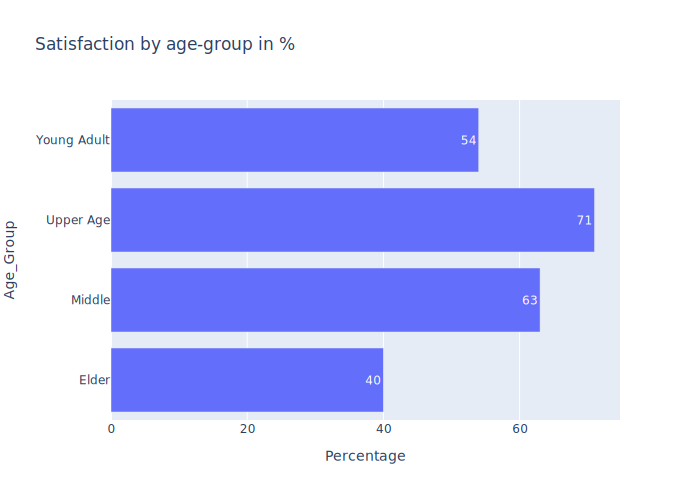

In [302]:
px.bar(satisfied_groups, x='num_sat', title='Satisfaction by age-group in %',
       labels={'num_sat': 'Percentage'},
       text_auto=True,
       orientation='h')

**observations**
- Across all age groups, females tend to have a higher satisfaction rate compared to males so age and gender together play a critical role in satisfaction, particularly within the Elder demographic
- The Elder and Young Adult male groups have the highest dissatisfaction rates while
the Middle and Upper Age groups are more balanced

#### Satisfaction by gender
- NOTE: 1= yes and 0=no so we can get the satisfaction rate easily as a %

In [289]:
gender_satisfied = round(shinki.groupby('Gender')['num_sat'].mean() * 100).to_frame()
gender_satisfied

,num_sat
Gender,
F,68.00
M,55.00


#### Observations: 
- There are more satisfied women than men across all age-groups and seat classes

## Hypothesis testing: Chi-Squared test for independence
Test Execution
1) Conduct the chi-squared test on the contingency table derived from the Gender and Satisfied columns.
2) Calculate the p-value to evaluate the hypotheses

State the hypothesis:
* $H_0$: There is no association between gender and passenger satisfaction.
* $H_1$: There is an association between gender and passenger satisfaction.

In [311]:
# first a crosstab of the gender and satisfied passengers
gender_satisfaction_cross = pd.crosstab(shinki['Gender'], shinki['Satisfied'])
gender_satisfaction_cross

Satisfied,no,yes
Gender,,
F,1968,4185
M,3123,3777


In [300]:
# let's run the chi-square test for independence
alpha = 0.05
chi2, p, dof, expected = chi2cont(gender_satisfaction_cross)
if p < alpha:
    print("Reject the null, there is a significant difference in average satisfaction between the genders")
else:
    print("Insufficient evidence to reject the null, there is association between gender and passenger satisfaction")

Reject the null, there is a significant difference in average satisfaction between the genders


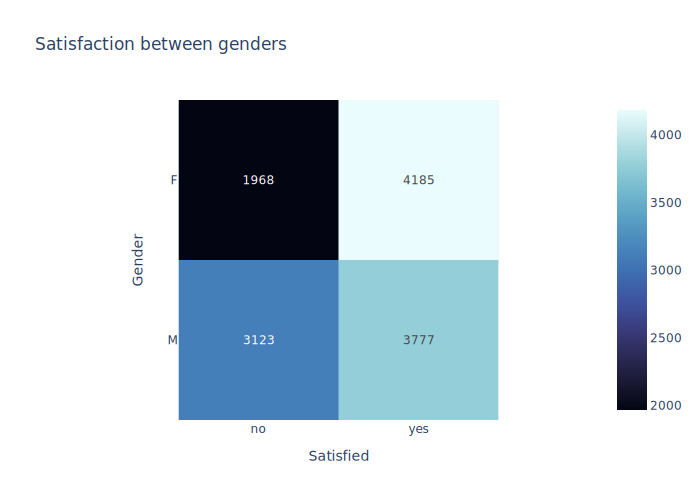

In [301]:
px.imshow(gender_satisfaction_cross,
         color_continuous_scale = 'ice', text_auto=True,
         title='Satisfaction between genders')

### Travel Metrics Analysis
- Visualizing Travel Distance and Delay Times
- visualization of Delay Times

### Regression analysis

In [312]:
# Assuming shinki is your DataFrame and it has 'Travel_Distance(km)' and 'delay(seconds)' columns
X = shinki['Travel_Distance(km)']
y = shinki['delay(seconds)']

# Adding a constant for the intercept term
X = sm.add_constant(X)

# Fitting the regression model
model = sm.OLS(y, X).fit()

# Getting the line of best fit
shinki['best_fit'] = model.predict(X)

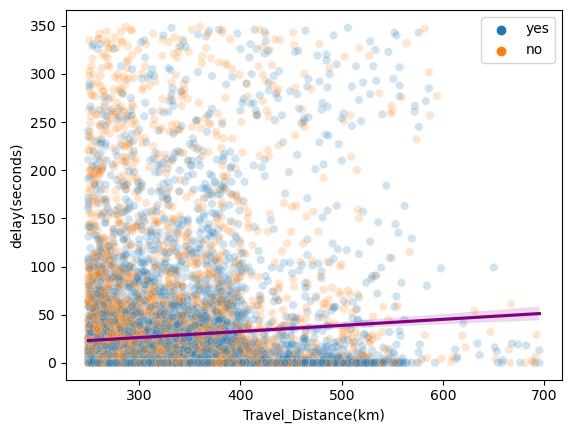

In [313]:
sns.scatterplot(data=shinki, x='Travel_Distance(km)', 
                y='delay(seconds)', hue='Satisfied', alpha=0.2)

# Add the line of best fit
sns.regplot(data=shinki, x='Travel_Distance(km)',
            y='delay(seconds)', scatter=False, color='purple', line_kws={'label': 'Trendline'})

# Add legend
plt.legend()

# Show the plot
plt.show()

**observations**
Observations:
- R² of 0.0029 suggests no significant linear correlation between travel distance and delays.
- Most journeys have low delays indicating punctuality
- Satisfied and dissatisfied passengers are distributed regardless of travel distance or delay, indicating other factors affect satisfaction
- Distance is not a reliable predictor of delay or passenger satisfaction and vice versa. 

## key insights and conclusion and recommendations
- Shinkansen needs to prioritize service quality and demographic-specific needs over logistical factors can significantly boost passenger satisfaction
- Diverse Age Groups: Mid-20s to early 40s are the largest passenger demographic. Satisfaction varies across age groups, highlighting the need for age-specific service adjustments.
- Gender and Satisfaction: A significant link between gender and satisfaction suggests gender-specific preferences should be considered in service improvements.
- Travel Factors: Minimal correlation between travel distance, delay times, and satisfaction points to other factors as primary determinants of passenger satisfaction.